### Seção 2 -  Comandos um pouco mais avançados

Ness segunda parte será apresentado comandos e teoria mais complexas que a primeira parte

1. Espaço de cores
2. Borramento
3. Operações BITWISE
4. Máscaras
5. Computação de Histogramas
6. Thresholding/Binarização de imagens

In [1]:
# Bibliotecas
import cv2
import numpy as np

In [2]:
img = cv2.imread('foto_sol.jpg')
cv2.imshow("Imagem Exemplo", img)
cv2.waitKey(0)

-1

In [3]:
img.shape

(465, 620, 3)

### Espaço de cores

https://learnopencv.com/color-spaces-in-opencv-cpp-python/



#### RGB 

A imagem possui três canais para representar suas cores.

* R->RED
* G->GREEN
* B->BLUE

In [4]:
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

# RGB - Blue
cv2.imshow('B-RGB', b)
# RGB - Green
cv2.imshow('G-RGB', g)
# RGB - Red
cv2.imshow('R-RGB', r)
cv2.waitKey(0)

-1

#### Espaço de Cor LAB

O espaço de cores do Lab possui três componentes.

     L - Luminosidade (Intensidade).
     a - componente de cor que varia de Verde a Magenta.
     b - componente de cor que varia de azul a amarelo.

O espaço de cores do Lab é bastante diferente do espaço de cores RGB. No espaço de cores RGB, as informações de cores são separadas em três canais, mas os mesmos três canais também codificam as informações de brilho. Por outro lado, no espaço de cores do Lab, o canal L é independente das informações de cores e codifica apenas o brilho. Os outros dois canais codificam cores.

Possui as seguintes propriedades.

 * Espaço de cores perceptualmente uniforme.
 * Independente do dispositivo (captura ou exibição).
 * Usado extensivamente no Adobe Photoshop.
 * Está relacionado ao espaço de cores RGB por uma equação de transformação complexa.

In [5]:
LAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow('LAB', LAB)
cv2.waitKey(0)


l = LAB[:,:,0]
a = LAB[:,:,1]
b = LAB[:,:,2]

# LAB - L
cv2.imshow('L-LAB', l)
# LAB - a
cv2.imshow('a-LAB', a)
# LAB - b
cv2.imshow('b-LAB', b)
cv2.waitKey(0)

-1

#### Espaço de cores YCrCb

O espaço de cores YCrCb é derivado do espaço de cores RGB e possui os três componentes a seguir.

     Y - Luminância ou componente Luma obtido do RGB após a correção de gama.
     Cr = R - Y (a que distância está o componente vermelho de Luma).
     Cb = B - Y (a que distância está o componente azul de Luma).

Este espaço de cores possui as seguintes propriedades.

 * Separa os componentes de luminância e crominância em canais diferentes.
 * Mais usado na compressão (de componentes Cr e Cb) para transmissão de TV.
 * Depende do dispositivo.

In [6]:
YCB = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
cv2.imshow('YCB', YCB)
cv2.waitKey(0)



-1

#### Espaço de Cores HSV

O espaço de cores HSV tem os três componentes a seguir

     H - matiz (comprimento de onda dominante).
     S - Saturação (Pureza / tonalidades da cor).
     V - Valor (Intensidade).

Vamos enumerar algumas de suas propriedades.

 * A melhor coisa é que ele usa apenas um canal para descrever a cor (H), tornando muito intuitivo especificar a cor.
 * Depende do dispositivo.


In [7]:
HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow('HSV', HSV)
cv2.waitKey(0)

h = HSV[:,:,0]
s = HSV[:,:,1]
v = HSV[:,:,2]

# LAB - L
cv2.imshow('L-LAB', h)
# LAB - a
cv2.imshow('a-LAB', s)
# LAB - b
cv2.imshow('b-LAB', v)
cv2.waitKey(0)

-1

### Segmentação do Espaço HSV

#### Rastreamento de Objetos

Agora que sabemos como converter a imagem BGR para HSV, podemos usar isso para extrair um objeto colorido. Em HSV, é mais fácil representar uma cor do que o espaço de cores RGB. Em nosso aplicativo, tentaremos extrair um objeto de cor azul. Então aqui está o método:

 * Analisar cada frame do vídeo
 * Converter de BGR para espaço de cores HSV
 * Limitamos a imagem HSV para uma gama de cores azuis
 * Extrair o objeto azul da imagem.
 
 
 
#### Como encontrar valores de HSV para rastrear?

É muito simples e você pode usar a mesma função, cv2.cvtColor (). Em vez de passar uma imagem, você apenas passa os valores BGR desejados. Por exemplo, para encontrar o valor HSV de Green, tente seguir os comandos no terminal Python:

    green = np.uint8([[[0,255,0 ]]])
    hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)
    print (hsv_green)
    [[[ 60 255 255]]]

In [8]:
import cv2
import numpy as np

cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    hsv_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Blue Filter
    low = np.array([94, 80, 2])
    high = np.array([255, 255, 255])
    mask = cv2.inRange(hsv_frame, low, high)
    blue_frame = cv2.bitwise_and(frame, frame, mask=mask)

    cv2.imshow('Blue_HSV', blue_frame)

    if cv2.waitKey(1) == 27:
        break


cv2.destroyAllWindows()
cap.release()

# Borramento/Desfoque


O que é desfoque?

Uma imagem borrada, ou suavizada é aquela onde as bordas não são observadas. Para fazer o borramento da imagem usa-se um filtro passa-baixa, porque permite que as baixas frequências e filtre naa altaa frequênciaa. Aqui, frequência significa a mudança do valor do pixel. Por exemplo, em torno da borda, o valor do pixel muda rapidamente. É útil para remover ruído.

O OpenCV fornece principalmente quatro tipos de técnicas de desfoque.

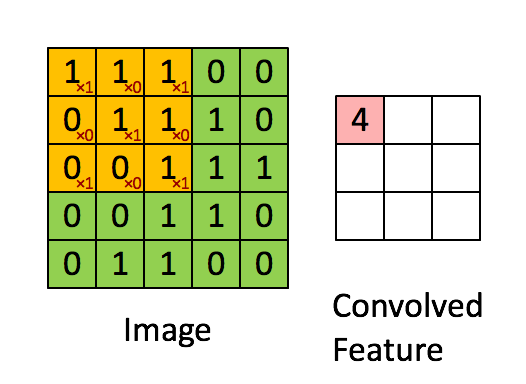


#### Filtro Média

Esse filtro simplesmente pega a média de todos os pixels sob a área do kernel, responsável pela filtragem, e substitui o elemento central por essa média. Isso é feito pela função **cv2.blur()**. V

$K=\frac{1}{9}\begin{bmatrix}1&1&1\\1&1&1\\1&1&1\end{bmatrix}$


#### Filtro Gaussiano

usa-se um kernel com distribução Gaussiano como filtro. Isso é feito com a função **cv2.GaussianBlur()**. Devemos **especificar a largura e altura do kernel**, que deve ser positiva e ímpar. Devemos também especificar o desvio padrão nas direções X e Y, sigmaX e sigmaY respectivamente. Se apenas sigmaX for especificado, sigmaY será considerado igual a sigmaX. Se ambos forem fornecidos como zeros, eles serão calculados a partir do tamanho do kernel. A filtragem gaussiana é altamente eficaz na remoção de ruído gaussiano da imagem.



#### Filtro de mediana

A função **cv2.medianBlur()** calcula a mediana de todos os pixels sob a janela do kernel e o pixel central é substituído por este valor mediano. Isso é altamente eficaz na remoção de ruído de sal e pimenta. O tamanho do kernel deve ser um número inteiro ímpar positivo.


#### Filtro Bilateral

Os filtros que apresentamos anteriormente tendem a desfocar as bordas. Esse não é o caso do filtro bilateral, **cv2.bilateralFilter()**, esse tipo de filtro é altamente eficaz na remoção de ruído preservando as bordas. Mas a operação é mais lenta em comparação com outros filtros. Já vimos que um filtro gaussiano pega a vizinhança a ao redor do pixel e encontra sua média ponderada gaussiana. Este filtro gaussiano é função apenas do espaço, ou seja, os pixels próximos são considerados durante a filtragem. Ele não considera se os pixels têm quase o mesmo valor de intensidade e não considera se o pixel está em uma borda ou não. O efeito resultante é que os filtros gaussianos tendem a desfocar as bordas, o que é indesejável.

O filtro bilateral também usa um filtro gaussiano no domínio do espaço, mas também usa mais um componente de filtro gaussiano (multiplicativo) que é uma função das diferenças de intensidade de pixel. A função gaussiana do espaço garante que apenas os pixels são 'vizinhos espaciais' são considerados para a filtragem, enquanto o componente gaussiano aplicado no domínio de intensidade (uma função gaussiana de diferenças de intensidade) garante que apenas os pixels com intensidades semelhantes às do centro pixel ('vizinhos de intensidade') são incluídos para calcular o valor de intensidade borrada. Como resultado, este método preserva as bordas, uma vez que para pixels próximos às bordas, os pixels vizinhos colocados no outro lado da borda e, portanto, exibindo grandes variações de intensidade quando comparados ao pixel central, não serão incluídos para desfoque.


In [9]:
img = cv2.imread('foto_sol.jpg')
cv2.imshow('Imagem', img)
cv2.waitKey(0)

# Averaging
average = cv2.blur(img, (9,9))
cv2.imshow('Average Blur', average)
cv2.waitKey(0)

# Gaussian Blur
gauss = cv2.GaussianBlur(img, (13,13), 0)
cv2.imshow('Gaussian Blur', gauss)
cv2.waitKey(0)

# Median Blur
median = cv2.medianBlur(img, 13)
cv2.imshow('Median Blur', median)
cv2.waitKey(0)

# Bilateral
bilateral = cv2.bilateralFilter(img, 10, 35, 25)
cv2.imshow('Bilateral', bilateral)
cv2.waitKey(0)

-1

# Bitwise

Operações bit a bit AND, OR, NOT e XOR. Eles serão muito úteis ao extrair qualquer parte da imagem, definir e trabalhar com ROIs não retangulares, etc. Abaixo, veremos um exemplo de como alterar uma determinada região de uma imagem .

Quero colocar o logotipo do OpenCV acima de uma imagem. Se eu adicionar duas imagens, a cor mudará. Se eu misturá-los, obtenho um efeito transparente. Mas eu quero que seja opaco. Se fosse uma região retangular, eu poderia usar o ROI como fizemos no capítulo anterior. Mas o logotipo da OpenCV não é uma forma retangular. Portanto, você pode fazer isso com operações bit a bit, conforme mostrado abaixo:

In [10]:
# Desenhar um retangulo
rectangle = np.zeros((300, 300), dtype="uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
cv2.imshow("Rectangle", rectangle)


# Desenhar um circulo
circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
cv2.imshow("Circle", circle)
cv2.waitKey(0)

-1

### bit a bit AND

A operação "AND" só é 'Verdadeiro' quando ambas as entradas têm um valor está 'presente nas duas figuras' - neste caso, a função **cv2.bitwise_and** examina cada pixel no retângulo e o círculo, do nosso exemplo; se **AMBOS** pixels têm um valor maior do que zero, então o pixel é ligado 'ON' (ou seja, 255) na imagem de saída; caso contrário, o valor de saída é definido como 'DESLIGADO' (ou seja, 0)


In [11]:
bitwiseAnd = cv2.bitwise_and(rectangle, circle)
cv2.imshow("AND", bitwiseAnd)
cv2.waitKey(0)

-1

### bit a bit OR

A operação'OR' examina cada pixel nas duas entradas, e se algum pixel no retângulo ou círculo é maior que 0, então o pixel de saída tem um valor de 255, caso contrário, é 0.
Usamos a função cv2.bitwise_or


In [12]:
bitwiseOr = cv2.bitwise_or(rectangle, circle)
cv2.imshow("OR", bitwiseOr)
cv2.waitKey(0)

-1

### bit a bit XOR

A operação bit a bit 'XOR' é idêntico à função 'OR', com um exceção: o retângulo e o círculo não são permitidos para **AMBOS**  tem valores maiores que 0 (apenas um pode ser 0)

In [13]:
bitwiseXor = cv2.bitwise_xor(rectangle, circle)
cv2.imshow("XOR", bitwiseXor)
cv2.waitKey(0)

-1

### bit a bit NOT

Finalmente, a operação 'NÃO' inverte os valores dos pixels; 
Pixels com valor de 255 tornam-se 0 e pixels com valor de 0  se tornou 255


In [14]:
bitwiseNot = cv2.bitwise_not (circle)
cv2.imshow ("NÃO", bitwiseNot)
cv2.waitKey (0)

-1

# Masking


Acabamos de ver sobre operações bit a bit usando portas digitais (AND, OR, XOR e NOT), com essas operações consiguimos criar ROIs nas imagems, Regiões de Interesse. 

Portanto podemos usar essa abordagem de operações bit a bit para criar máscaras nas imagens. Simplificando: uma máscara permite-nos focalizar apenas as partes da imagem que nos interessam.



In [15]:
import cv2
import numpy as np

img = cv2.imread('foto_sol.jpg')
cv2.imshow('Imagem', img)
cv2.waitKey(0)

circle = cv2.circle(np.zeros(img.shape[:2], dtype='uint8'), (img.shape[1]//2,img.shape[0]//2), 100, 255, -1)
cv2.imshow('Circle', circle)
cv2.waitKey(0)


masked = cv2.bitwise_and(img,img,mask=circle)
cv2.imshow('Mascara', masked)
cv2.waitKey(0)


-1

# Computando Histograma

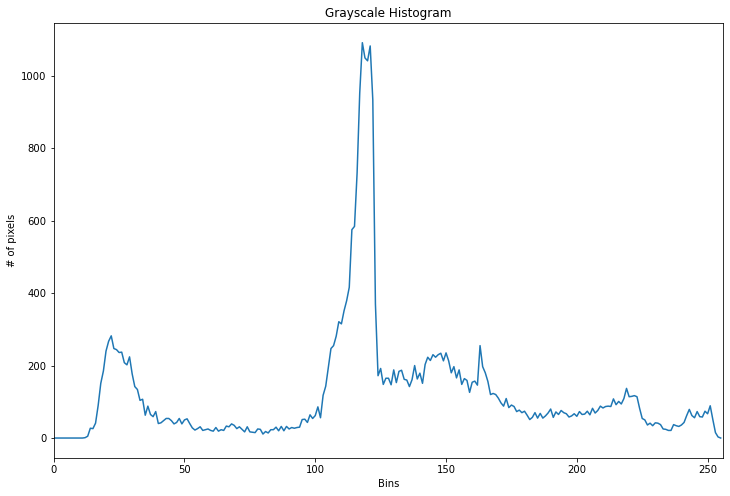

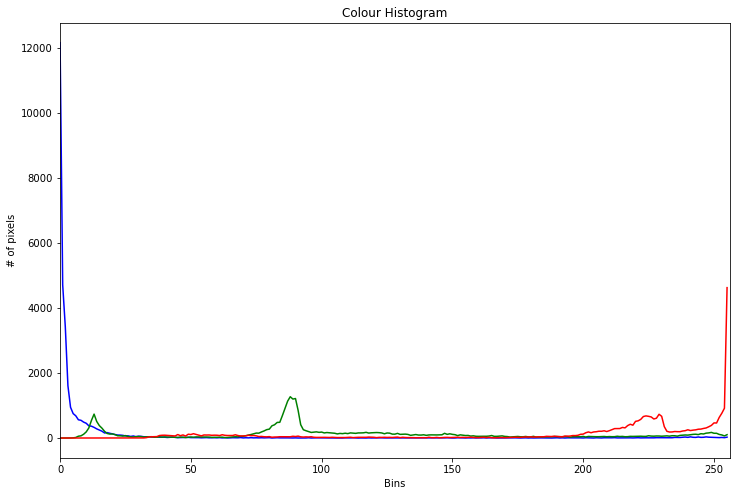

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('foto_sol.jpg')
cv2.imshow('Imagem', img)

blank = np.zeros(img.shape[:2], dtype='uint8')

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray', gray)

mask = cv2.circle(blank, (img.shape[1]//2,img.shape[0]//2), 100, 255, -1)

masked = cv2.bitwise_and(img,img,mask=mask)
cv2.imshow('Mask', masked)

# GRayscale histogram
gray_hist = cv2.calcHist([gray], [0], mask, [256], [0,256] )

plt.figure(figsize=(12,8))
plt.title('Grayscale Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
plt.plot(gray_hist)
plt.xlim([0,256])
plt.show()

# Colour Histogram

plt.figure(figsize=(12,8))
plt.title('Colour Histogram')
plt.xlabel('Bins')
plt.ylabel('# of pixels')
colors = ('b', 'g', 'r')
for i,col in enumerate(colors):
    hist = cv2.calcHist([img], [i], mask, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.show()
cv2.waitKey(0)

# Detecção de contorno

In [ ]:
import cv2 
import numpy as np

img = cv2.imread('foto_sol.jpg')
cv2.imshow('Park', img)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Gray', gray)

# Laplacian
lap = cv2.Laplacian(gray, cv2.CV_64F)
lap = np.uint8(np.absolute(lap))
cv2.imshow('Laplacian', lap)

# Sobel 
sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1)
combined_sobel = cv2.bitwise_or(sobelx, sobely)

cv2.imshow('Sobel X', sobelx)
cv2.imshow('Sobel Y', sobely)
cv2.imshow('Combined Sobel', combined_sobel)

canny = cv2.Canny(gray, 150, 175)
cv2.imshow('Canny', canny)
cv2.waitKey(0)